In [1]:
import os
import time

import tqdm
def notqdm(iterable, *args, **kwargs): 
    """ replacement for tqdm that just passes back the iterable useful to silence `tqdm` in tests """ 
    return iterable 
tqdm.tqdm = notqdm

import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from src.detector import extract

[nltk_data] Downloading package punkt to /home/marcos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


--- Model Albert for NER ---
--- Albert for QA ---


/opt/miniconda3/envs/kpmgtest/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


##### Metrics

In [2]:
with open("../data/labels.txt", "r") as f:
    labels = f.read().split()
label_map = {i: label for i, label in enumerate(labels)}
reversed_label_map = {label: i for i, label in enumerate(labels)}

##### engtest

In [3]:
with open("../data/engtest.txt", "r") as f:
    engtest = f.read()
    
docs = engtest.split("\n\n")

In [12]:
# t0 = time.time()
# t1 = time.time()

# real_idxs = []
# pred_idxs = []
# for i, doc in enumerate(docs):
#     words_doc = [line.split("\t")[0] for line in doc.split("\n")]
#     result, _ = extract(" ".join(words_doc))

#     real_ents = [line.split("\t")[1] for line in doc.split("\n")]
#     real_idxs += [reversed_label_map[real_ent] for real_ent in real_ents]
#     pred_ents = [ent[1] for ent in result]
#     pred_idxs += [reversed_label_map[ent] for ent in pred_ents]
    
#     if i % 100 == 0:
#         print(f"Processed {i} of {len(docs)}")
#         print(f"Processed last 100 in {time.time()-t1}")
#         t1 = time.time()

print(f"Finished in {time.time()-t0}")
        
with open("../data/preds_engtest.txt", "w") as f:
    f.write(" ".join([str(a) for a in pred_idxs]))
    
with open("../data/real_engtest.txt", "w") as f:
    f.write(" ".join([str(a) for a in real_idxs]))

Finished in 10371.049206733704


In [84]:
with open("../data/preds_engtest.txt", "r") as f:
    pred_idxs = [int(i) for i in f.read().split()]
    
with open("../data/real_engtest.txt", "r") as f:
    real_idxs = [int(i) for i in f.read().split()]

Precission: 0.7613627157093089
Accuracy: 0.7613627157093089
Recall: 0.7613627157093089
f1-score: 0.7613627157093089
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.97      0.59      0.73       456
           3       0.96      0.83      0.89       500
           4       0.91      0.14      0.24       451
           5       0.88      0.68      0.77      1117
           6       0.14      0.01      0.02        90
           9       0.00      0.00      0.00        54
          10       0.85      0.74      0.79       812
          11       0.46      0.05      0.09       562
          14       0.94      0.59      0.72       720
          15       0.76      0.73      0.75        30
          17       0.00      0.00      0.00         0
          18       0.98      0.56      0.71       496
          19       0.59      0.78      0.67       226
          20       0.81      0.15      0.25       403
          21       

<AxesSubplot:>

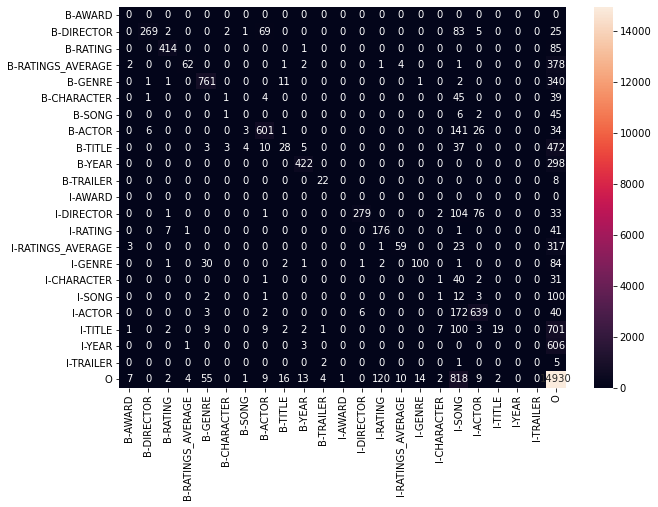

In [85]:
print(f"Precission: {precision_score(real_idxs, pred_idxs, average='micro')}")
print(f"Accuracy: {accuracy_score(real_idxs, pred_idxs)}")
print(f"Recall: {recall_score(real_idxs, pred_idxs, average='micro')}")
print(f"f1-score: {f1_score(real_idxs, pred_idxs, average='micro')}")
      
print(classification_report(real_idxs, pred_idxs))

idxs = list(set(real_idxs + pred_idxs))
idxs.sort()
columns = [labels[i] for i in idxs]

df_cm = pd.DataFrame(confusion_matrix(real_idxs, pred_idxs), index=columns,
                  columns=columns)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [80]:
idxs_not = [i for i, label in enumerate(labels) if label in ['B-REVIEW', 'B-QUOTE', 'B-ORIGIN', 'B-PLOT', 'B-RELATIONSHIP', 'I-REVIEW', 'I-QUOTE', 'I-ORIGIN', 'I-PLOT', 'I-RELATIONSHIP']]

In [81]:
real_idxs = [i if i not in idxs_not else 32 for i in real_idxs]
pred_idxs = [i if i not in idxs_not else 32 for i in pred_idxs]

Precission: 0.7613627157093089
Accuracy: 0.7613627157093089
Recall: 0.7613627157093089
f1-score: 0.7613627157093089
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.97      0.59      0.73       456
           3       0.96      0.83      0.89       500
           4       0.91      0.14      0.24       451
           5       0.88      0.68      0.77      1117
           6       0.14      0.01      0.02        90
           9       0.00      0.00      0.00        54
          10       0.85      0.74      0.79       812
          11       0.46      0.05      0.09       562
          14       0.94      0.59      0.72       720
          15       0.76      0.73      0.75        30
          17       0.00      0.00      0.00         0
          18       0.98      0.56      0.71       496
          19       0.59      0.78      0.67       226
          20       0.81      0.15      0.25       403
          21       

<AxesSubplot:>

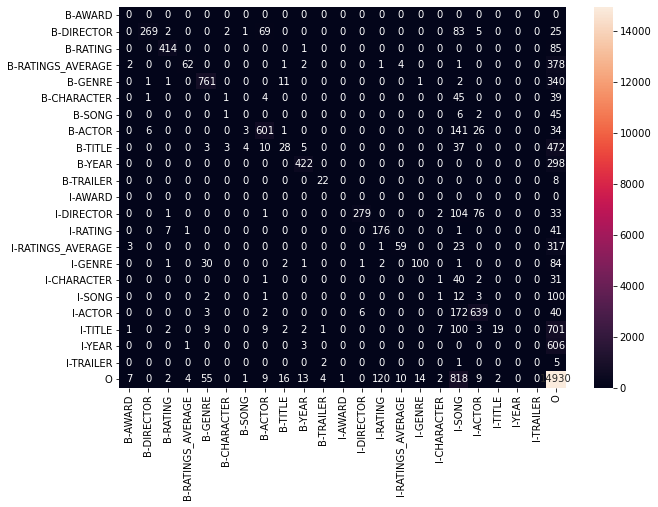

In [82]:
print(f"Precission: {precision_score(real_idxs, pred_idxs, average='micro')}")
print(f"Accuracy: {accuracy_score(real_idxs, pred_idxs)}")
print(f"Recall: {recall_score(real_idxs, pred_idxs, average='micro')}")
print(f"f1-score: {f1_score(real_idxs, pred_idxs, average='micro')}")
      
print(classification_report(real_idxs, pred_idxs))

idxs = list(set(real_idxs + pred_idxs))
idxs.sort()
columns = [labels[i] for i in idxs]

df_cm = pd.DataFrame(confusion_matrix(real_idxs, pred_idxs), index=columns,
                  columns=columns)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

##### triviatest

In [57]:
with open("../data/trivia10k13test.txt", "r") as f:
    triviatest = f.read()
    
docs = triviatest.split("\n\n")

In [46]:
t0 = time.time()
t1 = time.time()

real_idxs = []
pred_idxs = []
for i, doc in enumerate(docs):
    words_doc = [line.split("\t")[0] for line in doc.split("\n")]
    result, _ = extract(" ".join(words_doc))

    real_ents = [line.split("\t")[1] for line in doc.split("\n")]
    real_idxs += [reversed_label_map[real_ent] for real_ent in real_ents]
    pred_ents = [ent[1] for ent in result]
    pred_idxs += [reversed_label_map[ent] for ent in pred_ents]
    
    if i % 100 == 0:
        print(f"Processed {i} of {len(docs)}")
        print(f"Processed last 100 in {time.time()-t1}")
        t1 = time.time()

print(f"Finished in {time.time()-t0}")
    
with open("../data/preds_triviatest.txt", "w") as f:
    f.write(" ".join([str(a) for a in pred_idxs]))
    
with open("../data/real_triviatest.txt", "w") as f:
    f.write(" ".join([str(a) for a in real_idxs]))

Finished in 14834.715437412262


In [73]:
with open("../data/preds_triviatest.txt", "r") as f:
    pred_idxs = [int(i) for i in f.read().split()]
    
with open("../data/real_triviatest.txt", "r") as f:
    real_idxs = [int(i) for i in f.read().split()]

Precission: 0.42866658127321633
Accuracy: 0.42866658127321633
Recall: 0.42866658127321633
f1-score: 0.42866658127321633
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       195
           1       0.38      0.30      0.34        66
           2       0.91      0.53      0.67       425
           3       0.00      0.00      0.00         0
           5       0.45      0.49      0.47       789
           6       0.07      0.01      0.01       283
           7       0.00      0.00      0.00        47
           8       0.00      0.00      0.00       190
           9       0.00      0.00      0.00         8
          10       0.82      0.71      0.76      1274
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00      1577
          13       0.00      0.00      0.00       171
          14       0.92      0.95      0.94       661
          15       0.00      0.00      0.00         0
          16   

<AxesSubplot:>

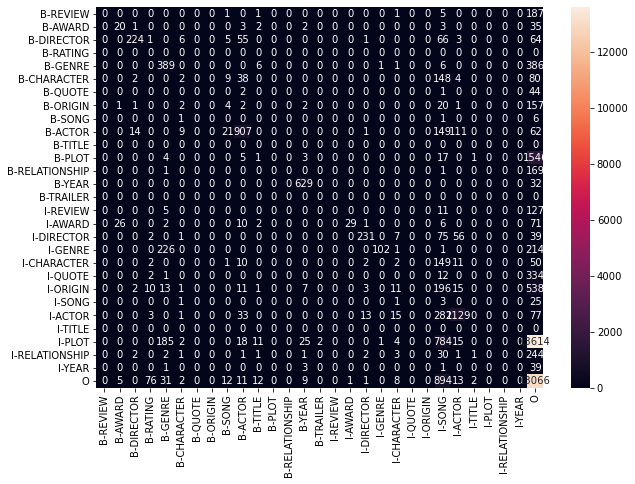

In [74]:
print(f"Precission: {precision_score(real_idxs, pred_idxs, average='micro')}")
print(f"Accuracy: {accuracy_score(real_idxs, pred_idxs)}")
print(f"Recall: {recall_score(real_idxs, pred_idxs, average='micro')}")
print(f"f1-score: {f1_score(real_idxs, pred_idxs, average='micro')}")
      
print(classification_report(real_idxs, pred_idxs))

idxs = list(set(real_idxs + pred_idxs))
idxs.sort()
columns = [labels[i] for i in idxs]

df_cm = pd.DataFrame(confusion_matrix(real_idxs, pred_idxs), index=columns,
                  columns=columns)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [42]:
idxs_not = [i for i, label in enumerate(labels) if label in ['B-REVIEW', 'B-QUOTE', 'B-ORIGIN', 'B-PLOT', 'B-RELATIONSHIP', 'I-REVIEW', 'I-QUOTE', 'I-ORIGIN', 'I-PLOT', 'I-RELATIONSHIP']]

In [43]:
real_idxs = [i if i not in idxs_not else 32 for i in real_idxs]
pred_idxs = [i if i not in idxs_not else 32 for i in pred_idxs]

Precission: 0.8631484565133855
Accuracy: 0.8631484565133855
Recall: 0.8631484565133855
f1-score: 0.8631484565133855
              precision    recall  f1-score   support

           1       0.38      0.30      0.34        66
           2       0.91      0.53      0.67       425
           3       0.00      0.00      0.00         0
           5       0.45      0.49      0.47       789
           6       0.07      0.01      0.01       283
           9       0.00      0.00      0.00         8
          10       0.82      0.71      0.76      1274
          11       0.00      0.00      0.00         0
          14       0.92      0.95      0.94       661
          15       0.00      0.00      0.00         0
          17       0.97      0.20      0.33       147
          18       0.91      0.56      0.69       411
          21       0.98      0.19      0.31       544
          22       0.04      0.01      0.01       227
          25       0.00      0.10      0.00        30
          26       

/opt/miniconda3/envs/kpmgtest/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/kpmgtest/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

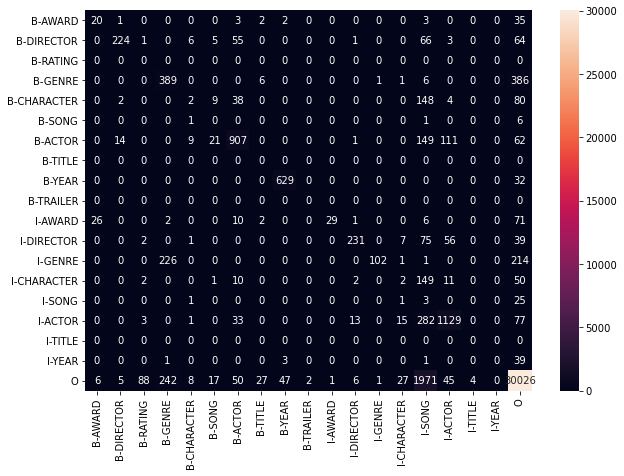

In [47]:
print(f"Precission: {precision_score(real_idxs, pred_idxs, average='micro')}")
print(f"Accuracy: {accuracy_score(real_idxs, pred_idxs)}")
print(f"Recall: {recall_score(real_idxs, pred_idxs, average='micro')}")
print(f"f1-score: {f1_score(real_idxs, pred_idxs, average='micro')}")
      
print(classification_report(real_idxs, pred_idxs))

idxs = list(set(real_idxs + pred_idxs))
idxs.sort()
columns = [labels[i] for i in idxs]

df_cm = pd.DataFrame(confusion_matrix(real_idxs, pred_idxs), index=columns,
                  columns=columns)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')